In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn import linear_model

#### Reading data from csv file

In [70]:
s_data = pd.read_csv('C:\Anaconda\Sam.csv')

#### Displaying our data

In [71]:
s_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-02,7680.0,7760.0,7650.0,7650.0,7354.826172,6120
1,2012-10-04,7650.0,7700.0,7630.0,7650.0,7354.826172,5209
2,2012-10-05,7650.0,7680.0,7640.0,7680.0,7383.668945,8440
3,2012-10-08,7690.0,7730.0,7690.0,7730.0,7431.739746,10480
4,2012-10-09,7700.0,7740.0,7650.0,7740.0,7441.354004,8461


In [72]:
s_data.shape

(1233, 7)

## Examinig data

##### Check if any values in data are null

In [73]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
Date         1233 non-null object
Open         1233 non-null float64
High         1233 non-null float64
Low          1233 non-null float64
Close        1233 non-null float64
Adj Close    1233 non-null float64
Volume       1233 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 67.5+ KB


##### Statistical info of our data

In [74]:
s_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,10107.656123,10225.271695,9968.094079,10117.258719,9951.822049,13013.128143
std,1820.361149,1875.704226,1754.373251,1821.684084,1875.176597,31968.530416
min,7010.000000,7060.000000,7000.000000,7040.000000,6825.400391,0.000000
25%,8150.000000,8190.000000,8040.000000,8130.000000,7911.258789,3981.000000
50%,10250.000000,10350.000000,10100.000000,10250.000000,10118.399414,6855.000000
75%,11650.000000,11750.000000,11400.000000,11600.000000,11416.626953,12456.000000
max,14600.000000,14800.000000,14200.000000,14600.000000,14600.000000,679805.000000


#### Exploring data with graphs

##### Opening of stocks vs Volume

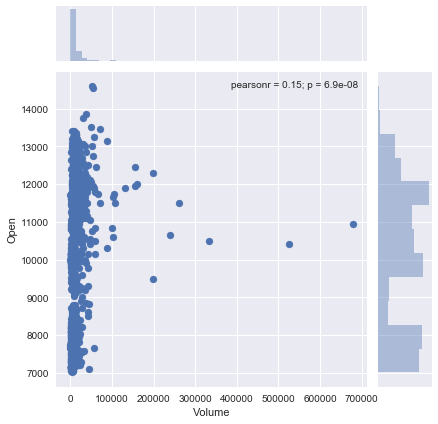

In [75]:
sns.jointplot(data = s_data, x="Volume",y="Open")  

#### Close vs Open

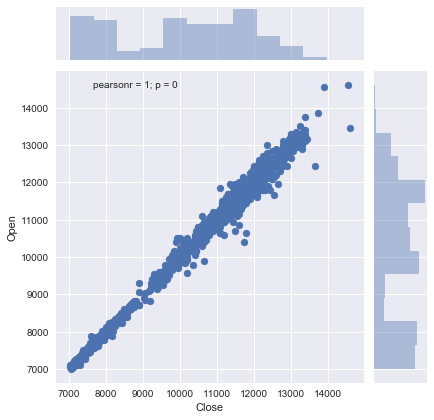

In [279]:
sns.jointplot(data = s_data, x="Close",y="Open")  

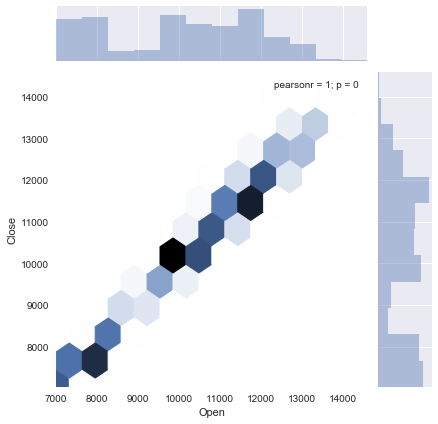

In [77]:
sns.jointplot(data = s_data, x="Open",y="Close",kind="hex")  

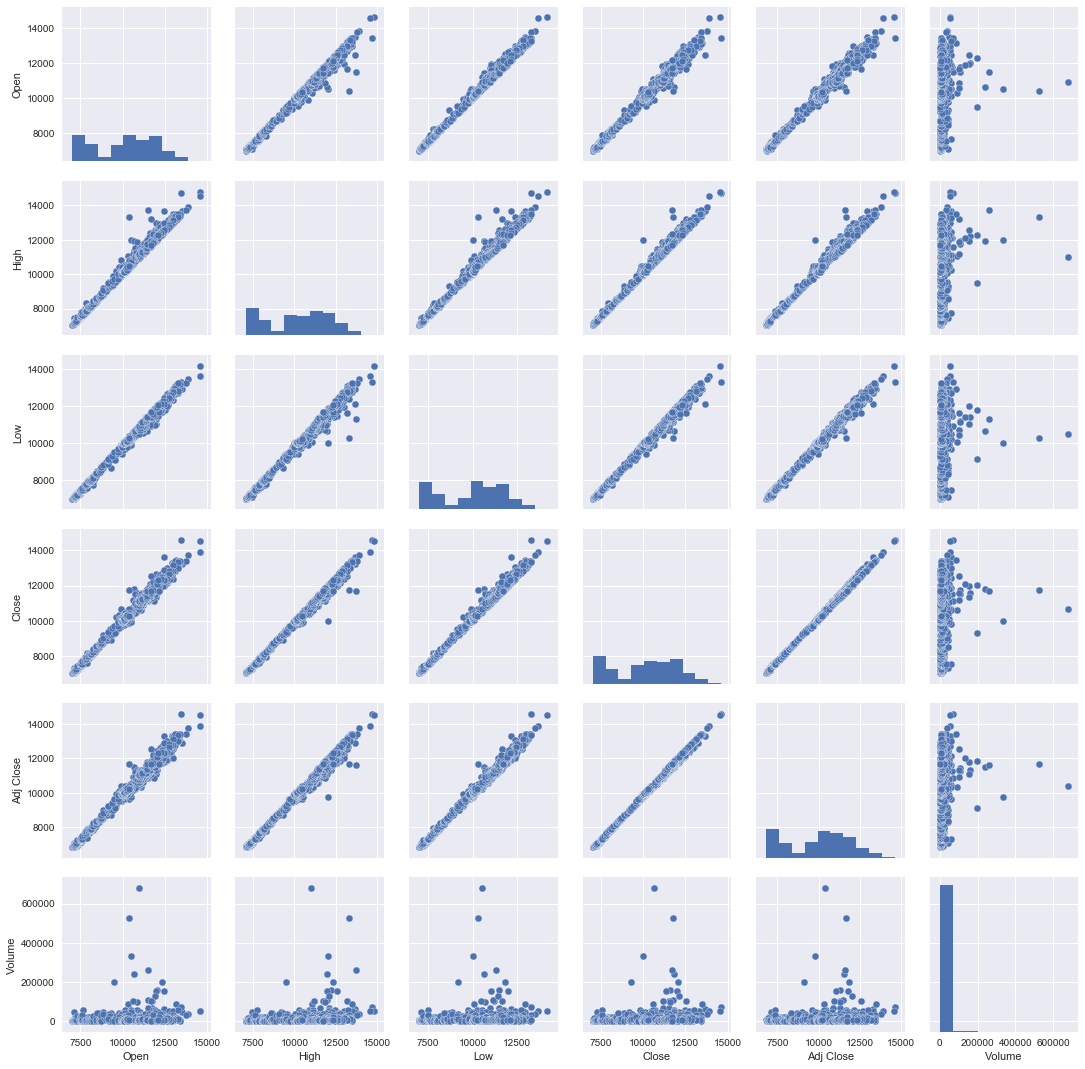

In [78]:
sns.pairplot(s_data)

In [80]:
stock_data = s_data

In [81]:
stock_data.values

array([['2012-10-02', 7680.0, 7760.0, ..., 7650.0, 7354.826172, 6120],
       ['2012-10-04', 7650.0, 7700.0, ..., 7650.0, 7354.826172, 5209],
       ['2012-10-05', 7650.0, 7680.0, ..., 7680.0, 7383.668945, 8440],
       ..., 
       ['2017-09-27', 11950.0, 12200.0, ..., 12200.0, 12200.0, 4130],
       ['2017-09-28', 12000.0, 12250.0, ..., 12100.0, 12100.0, 5377],
       ['2017-09-29', 12100.0, 12300.0, ..., 12300.0, 12300.0, 4640]], dtype=object)

#### Relation between Day and Open prices

In [280]:
dates = []
prices = []
for data in s_data.values:
    dates.append(int(data[0].split('-')[2]))
    prices.append((float(data[1])))
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(prices,(len(prices),1))

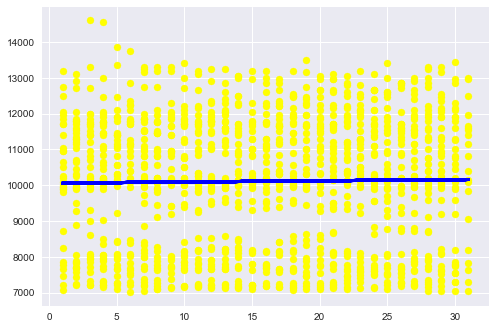

In [281]:
linear_mod = linear_model.LinearRegression()
linear_mod.fit(dates,prices)

plt.scatter(dates,prices,color='yellow')
plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=3)
plt.show()

In [283]:
y = dates
X = prices
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_
predictions = lm.predict(X_test)

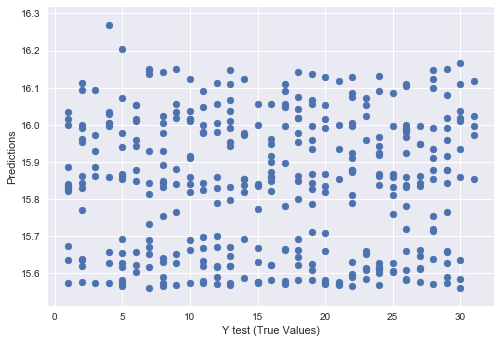

In [284]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True Values)')
plt.ylabel('Predictions')

In [285]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('MSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.52838788605
MSE 75.5803196592
MSE 8.69369424694


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


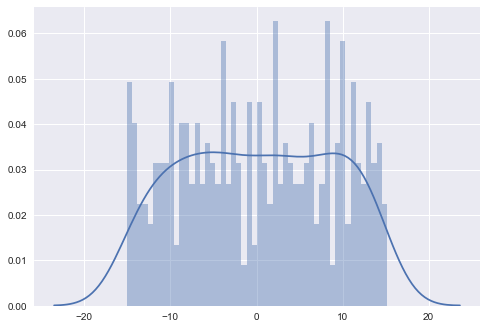

In [286]:
sns.distplot((y_test-predictions),bins=50)

In [ ]:
s_data.columns

In [192]:
s_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2012-10-02,7680.0,7760.0,7650.0,7650.0,7354.826172,6120,2
1,2012-10-04,7650.0,7700.0,7630.0,7650.0,7354.826172,5209,4
2,2012-10-05,7650.0,7680.0,7640.0,7680.0,7383.668945,8440,5
3,2012-10-08,7690.0,7730.0,7690.0,7730.0,7431.739746,10480,8
4,2012-10-09,7700.0,7740.0,7650.0,7740.0,7441.354004,8461,9


In [193]:
y=s_data["Open"]

In [194]:
X=s_data[['Day', 'Close']]

In [195]:
from sklearn.cross_validation import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
lm = LinearRegression()

In [199]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
lm.coef_

array([ 0.62308316,  0.99438815])

In [201]:
predictions = lm.predict(X_test)

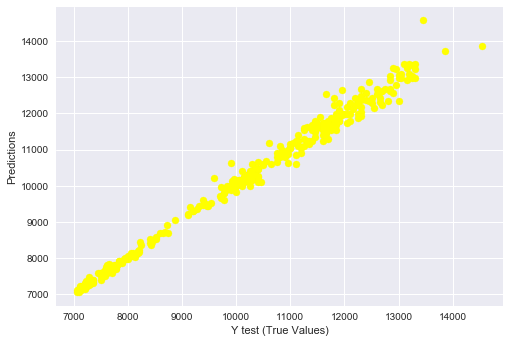

In [202]:
plt.scatter(y_test,predictions,color="yellow")
plt.xlabel('Y test (True Values)')
plt.ylabel('Predictions')

In [116]:
from sklearn import metrics

In [117]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('MSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 1.3472706434e-15
MSE 6.97089198223e-30
MSE 2.64024468227e-15


In [118]:
metrics.explained_variance_score(y_test,predictions)

1.0

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


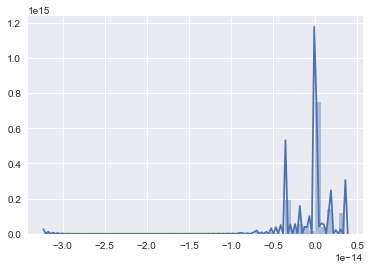

In [119]:
sns.distplot((y_test-predictions),bins=50)

In [122]:
import numpy as ny

#### Randomly selecting train and test data by spliting our original data

In [124]:
m = ny.random.rand(len(s_data)) < 0.8
train_data = s_data[m]
test_data = s_data[~m]

##### Displaying some rows of train data

In [128]:
train_data.head()

,Open,Close,Adj Close,Volume,Day
0,7680.0,7650.0,7354.826172,6120,2
1,7650.0,7650.0,7354.826172,5209,4
2,7650.0,7680.0,7383.668945,8440,5
3,7690.0,7730.0,7431.739746,10480,8
4,7700.0,7740.0,7441.354004,8461,9


#### In our model we will consider only Open, Day, Volume and Close. So we will drop other columns from our train and test data

In [130]:
train_data = train_data.drop(["Adj Close"],1)

In [136]:
test_data = test_data.drop(["Adj Close"],1)

##### Displaying some rows of train data after dropping high, low and adjusted_close from our data

In [131]:
train_data.head()

,Open,Close,Volume,Day
0,7680.0,7650.0,6120,2
1,7650.0,7650.0,5209,4
2,7650.0,7680.0,8440,5
3,7690.0,7730.0,10480,8
4,7700.0,7740.0,8461,9


#### Selecting features for our model and our target feature

In [223]:
feat = ['Day','Close','Volume']
X_features = train_data[feat]
y = train_data["Open"]

#### Here X_features  represents the  features and y is our target variable

In [224]:
X_features.head()

,Day,Close,Volume
0,2,7650.0,6120
1,4,7650.0,5209
2,5,7680.0,8440
3,8,7730.0,10480
4,9,7740.0,8461


In [225]:
y.head()

0    7680.0
1    7650.0
2    7650.0
3    7690.0
4    7700.0
Name: Open, dtype: float64

#### Implementing Linear Regression on our train data

In [226]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Displaying the coefficients and intercept of our model

In [227]:
print(l.intercept_)
print(l.coef_)

37.5734876159
[  8.68225028e-01   9.93704836e-01   9.24072968e-05]


In [228]:
zip(feat, l.coef_)

In [229]:
test_data.tail()

,Open,Close,Volume,Day,Ones
1206,13200.0,13100.0,12289,23,1.0
1210,13300.0,13000.0,12286,29,1.0
1214,12450.0,12450.0,15471,4,1.0
1220,12350.0,12300.0,8820,12,1.0
1230,11950.0,12200.0,4130,27,1.0



#### Loading our test data values to new data frame for prediction

In [230]:
pred_feat = test_data[feat]
y_true = test_data["Open"]

In [231]:
our_pred=l.predict(pred_feat)

#### Below are the prediction of Open for the features Close ,date and volume

In [232]:
our_pred

array([  7698.93211495,   7625.13585343,   7530.53763353,   7307.46229824,
         7475.47455793,   7377.03421229,   7381.64753539,   7315.64580118,
         7335.96961028,   7317.90524261,   7274.9887317 ,   7197.92338662,
         7194.59337334,   7158.45779987,   7183.46029795,   7200.72581332,
         7181.16374212,   7174.89355679,   7158.4239788 ,   7152.74858531,
         7125.06662131,   7295.70065143,   7216.12910413,   7210.01847228,
         7234.85888797,   7233.63077862,   7128.61117918,   7241.78547564,
         7458.6330751 ,   7571.06661013,   7624.76367138,   7586.72349111,
         7592.73596066,   7781.46009859,   8022.14014312,   7777.47910984,
         7938.53247262,   7892.49699852,   7846.87935629,   7888.36399977,
         7604.7903871 ,   7676.34447919,   7725.02086021,   7746.88192316,
         7730.56666534,   7657.21337047,   7722.73406622,   7649.20528989,
         7721.28099602,   7724.26228932,   7869.9225267 ,   8142.92477401,
         8281.66190126,  

#### True values of Open

In [233]:
y_true

6        7680.0
10       7620.0
14       7420.0
18       7350.0
23       7450.0
24       7500.0
28       7360.0
39       7310.0
40       7340.0
42       7300.0
43       7310.0
46       7220.0
52       7160.0
54       7150.0
57       7150.0
66       7150.0
67       7190.0
69       7230.0
73       7120.0
76       7120.0
78       7100.0
102      7320.0
111      7220.0
114      7200.0
118      7280.0
122      7200.0
126      7200.0
130      7220.0
135      7280.0
137      7450.0
         ...   
1086    11650.0
1087    12750.0
1093    12300.0
1108    11900.0
1112    11900.0
1113    12100.0
1114    11850.0
1123    11700.0
1145    12800.0
1153    13300.0
1154    13300.0
1156    13250.0
1158    13200.0
1159    13200.0
1160    13150.0
1162    12950.0
1169    13450.0
1171    14550.0
1174    13250.0
1179    12500.0
1182    12750.0
1190    12500.0
1193    13300.0
1198    13400.0
1201    13000.0
1206    13200.0
1210    13300.0
1214    12450.0
1220    12350.0
1230    11950.0
Name: Open, dtype: float

##### calculating error in our model

In [234]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_true, our_pred)

67.685110541027825

##### converting our float to integer format for calculating accuracy of our model

In [235]:
int_true=y_true.astype(int)
int_pred=our_pred.astype(int)

In [236]:
int_true.tail()

1206    13200
1210    13300
1214    12450
1220    12350
1230    11950
Name: Open, dtype: int32

In [237]:
test_data.tail()

,Open,Close,Volume,Day,Ones
1206,13200.0,13100.0,12289,23,1.0
1210,13300.0,13000.0,12286,29,1.0
1214,12450.0,12450.0,15471,4,1.0
1220,12350.0,12300.0,8820,12,1.0
1230,11950.0,12200.0,4130,27,1.0


#### calculating predictions for our test data

In [238]:
           # Day,Close,Volume     
l.predict([23,13100,12289])

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 13076.21160243])

In [239]:
from sklearn.metrics import accuracy_score
         # Day,Close,Volume, Open 
y_pred = [23,13100,12289,13076]
y_true = [23,13100,12289,13200]
accuracy_score(y_true, y_pred)

0.75

In [240]:
test_data.head()

,Open,Close,Volume,Day,Ones
6,7680.0,7700.0,3040,11,1.0
10,7620.0,7620.0,8351,17,1.0
14,7420.0,7520.0,3621,23,1.0
18,7350.0,7290.0,6515,29,1.0
23,7450.0,7480.0,7010,5,1.0


In [241]:
l.predict([11,7700,3040])

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 7698.93211495])

In [252]:
train_data.head()

,Open,Close,Volume,Day,Ones
0,7680.0,7650.0,6120,2,1.0
1,7650.0,7650.0,5209,4,1.0
2,7650.0,7680.0,8440,5,1.0
3,7690.0,7730.0,10480,8,1.0
4,7700.0,7740.0,8461,9,1.0


In [253]:
import statsmodels.formula.api as sf
train_data['Ones'] = ny.ones(( len(train_data), ))
target = train_data.Open[:-1]
featu = train_data[['Day','Volume','Close','Ones']][:-1]
result = sf.OLS( target, featu ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.723e+04
Date:                Sun, 01 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:39:46   Log-Likelihood:                -6549.8
No. Observations:                1000   AIC:                         1.311e+04
Df Residuals:                     996   BIC:                         1.313e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Day            0.9007      0.626      1.438      0.151        -0.328     2.130
Volume      8.984e-05      0.000      0.484      0.628        -0.000     0.000
Close          0.9938      0.003    330.279      0.000         0.988     1.000
Ones          35.9656     32.192      1.117      0.264       -27.206    99.137
==============================================================================
Omnibus:                      225.545   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1928.651
Skew:                          -0.779   Prob(JB):                         0.00
Kurtosis:                       9.623   Cond. No.                     1.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [276]:
import statsmodels.api as sm
b = s_data.Open
A = s_data.Close
A = sm.add_constant(A)

In [277]:
est = sm.OLS(b,A)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.302e+05
Date:                Sun, 01 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:56:53   Log-Likelihood:                -8125.6
No. Observations:                1233   AIC:                         1.626e+04
Df Residuals:                    1231   BIC:                         1.627e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         45.2125     28.338      1.595      0.111       -10.384   100.809
Close          0.9946      0.003    360.790      0.000         0.989     1.000
==============================================================================
Omnibus:                      378.457   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4250.240
Skew:                          -1.086   Prob(JB):                         0.00
Kurtosis:                      11.832   Cond. No.                     5.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
est.params

const    45.212537
Close     0.994582
dtype: float64

In [271]:
A_prime = np.linspace(A.Close.min(), A.Close.max(), 100)[:, np.newaxis]
A_prime = sm.add_constant(A_prime)

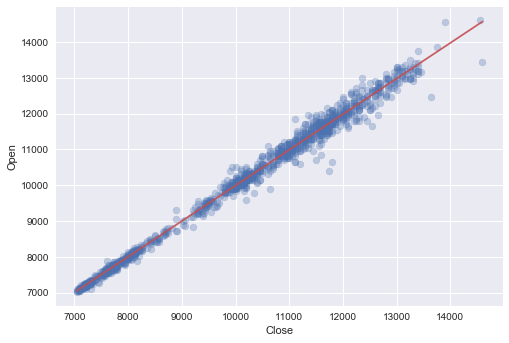

In [273]:
b_hat = est.predict(A_prime)
plt.scatter(A.Close, b, alpha=0.3)  # Plot the raw data
plt.xlabel("Close")
plt.ylabel("Open")
plt.plot(A_prime[:, 1], b_hat, 'r', alpha=0.9)

In [254]:
test_data['Ones'] = ny.ones(( len(test_data), ))

X = test_data[['Day','Volume','Close','Ones']][:-1]

In [255]:
ypred = result.predict(X)

In [256]:
print(ypred)

[  7698.66650318   7625.04105038   7530.63686091   7307.71920037
   7474.9756001    7376.55309858   7381.37776818   7315.83954407
   7336.21003213   7318.20597178   7274.39929063   7197.42584304
   7194.36365721   7158.34888852   7183.55098963   7200.32015728
   7180.80343513   7174.65641518   7158.31600791   7152.80384527
   7125.17201597   7295.14709717   7215.91236714   7209.97706878
   7235.0215945    7232.96773185   7128.04113135   7241.46171985
   7458.50546432   7571.09268008   7624.91105236   7587.04463816
   7592.19441498   7781.29031895   8021.65195347   7777.53865447
   7937.97847362   7892.06148171   7846.60730785   7888.16203415
   7604.70611211   7676.72862254   7724.63620664   7746.55780705
   7730.36742879   7657.22922991   7722.24318696   7648.93438622
   7721.06235698   7724.18716888   7869.33310052   8142.57905038
   8281.34484233   8177.34872916   8158.51684006   8242.37084185
   8061.64393282   8022.07925967   7760.26808409   7644.34267504
   7606.84527631   7730.4

In [258]:
y_true

[23, 13100, 12289, 13200]

#### plots for our data. Features vs the target variable

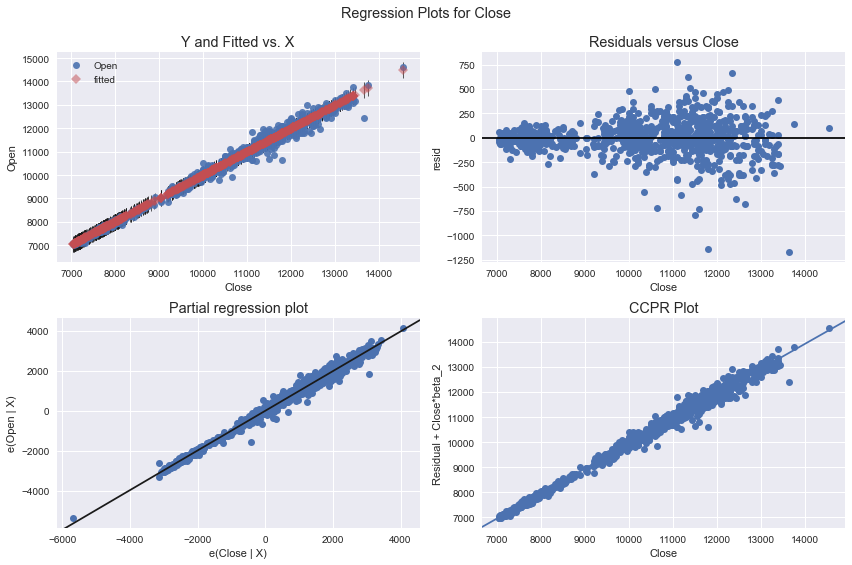

In [260]:
import statsmodels.api as st
fig = plt.figure(figsize=(12,8))
fig = st.graphics.plot_regress_exog(result, "Close", fig=fig)

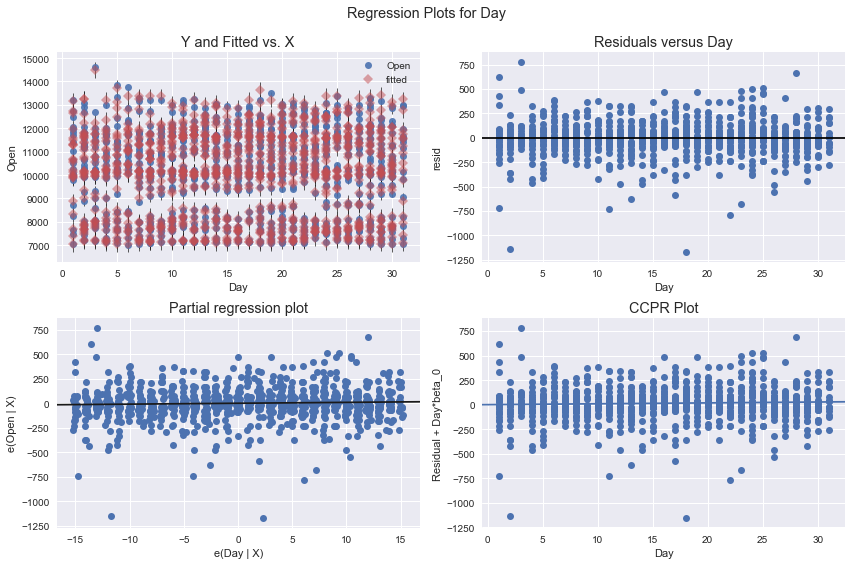

In [261]:
fig = plt.figure(figsize=(12,8))
fig = st.graphics.plot_regress_exog(result, "Day", fig=fig)

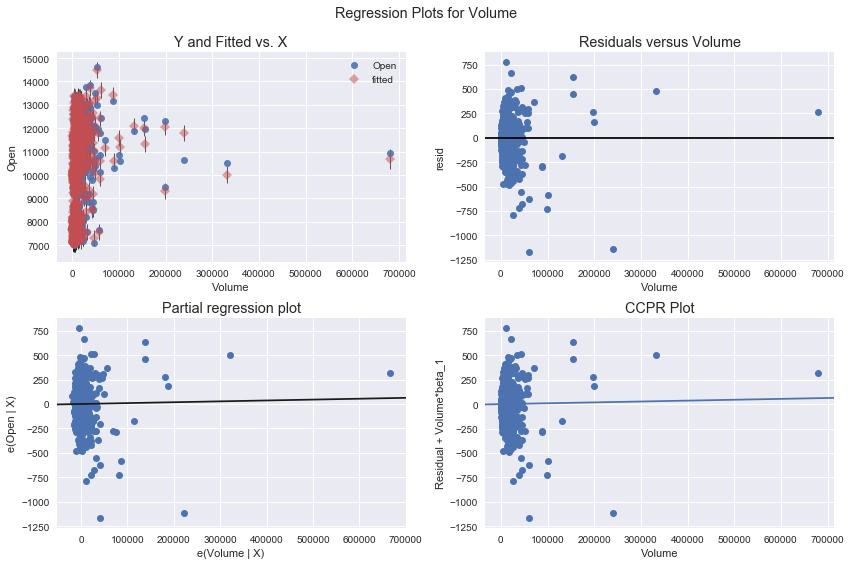

In [262]:
fig = plt.figure(figsize=(12,8))
fig = st.graphics.plot_regress_exog(result, "Volume", fig=fig)